<a href="https://colab.research.google.com/github/khietvuarong/ML-Basics-Exercise/blob/main/Extra_Credit_housing_demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   month    sales
0      1   500000
1      2   260000
2      3   480000
3      4  1200000
4      5  2500000

Model R² Score: 0.116

Next 6-Month Forecast:
   month  predicted_sales
0     13       2034848.48
1     14       2118030.30
2     15       2201212.12
3     16       2284393.94
4     17       2367575.76
5     18       2450757.58


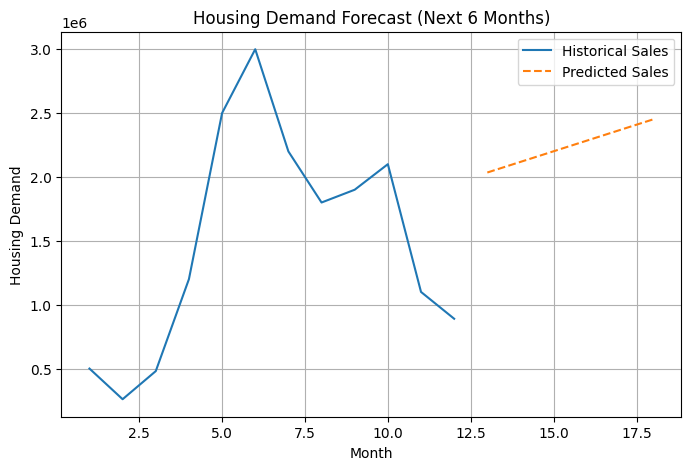


Forecast plot saved as 'housing_demand_forecast.png'


In [1]:
# This tool
# 1. Loads historical housing sales data from CSV
# 2. Trains a Linear Regression model
# 3. Forecasts demand for the next 6 months
# 4. Visualizes historical + predicted demand
# ==========================================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1. Load Dataset
df = pd.read_csv('sales_data.csv')

# Basic preprocessing
df = df.dropna()
df = df.sort_values('month')

print("Dataset Preview:")
print(df.head())

# 2. Define Features and Target
X = df[['month']]
y = df['sales']

# 3. Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Evaluate model
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"\nModel R² Score: {r2:.3f}")

# 4. Forecast Next 6 Months
last_month = df['month'].max()

future_months = pd.DataFrame({
    'month': range(last_month + 1, last_month + 7)
})

predictions = model.predict(future_months)

forecast_df = pd.DataFrame({
    'month': future_months['month'],
    'predicted_sales': predictions.round(2)
})

print("\nNext 6-Month Forecast:")
print(forecast_df)

# 5. Visualization
plt.figure(figsize=(8,5))

plt.plot(df['month'], y, label='Historical Sales')
plt.plot(future_months['month'], predictions,
         label='Predicted Sales', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Housing Demand')
plt.title('Housing Demand Forecast (Next 6 Months)')
plt.legend()
plt.grid(True)

plt.savefig("housing_demand_forecast.png")
plt.show()

print("\nForecast plot saved as 'housing_demand_forecast.png'")
